# Adding randomness

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_file = 'diffr_monolithic.h5'
output_file = 'noise.h5'

## Plot original diffraction pattern

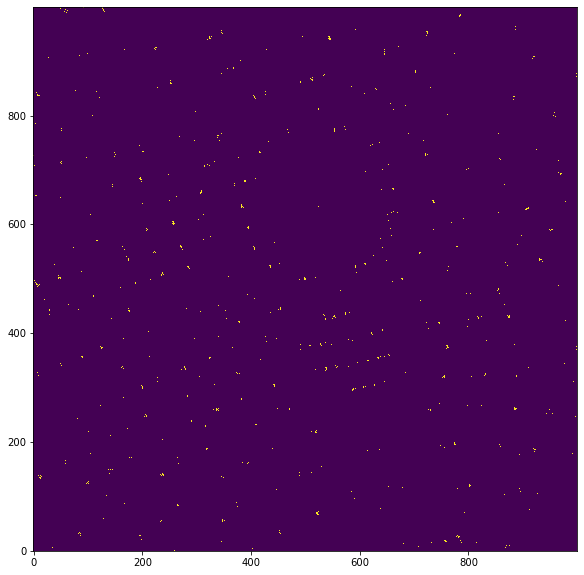

In [3]:
with h5py.File(input_file, 'r') as f:
    frame2 = f['data/0000002/data'][...]

fig, ax = plt.subplots(figsize=(12, 10))
plt.imshow(frame2, vmin=0, vmax=5000, origin='lower');

## Add random noise

We'll pick a small number of random pixels in each frame and set them to a large positive value,
to see how a faulty detector could affect the results.

In [4]:
rand_size = 2

with h5py.File(input_file, 'r') as f:
    with h5py.File(output_file, 'w') as of:
        f.copy('params', of)
        for i in f['data']:
            frame = f['data'][i]['data'][...]

            # Choose pixels
            Ny, Nx = frame.shape
            ran_y = np.random.randint(Nx, size=rand_size)
            ran_x = np.random.randint(Ny, size=rand_size)

            # Set these to large values
            for y, x in zip(ran_y, ran_x):
                frame[y, x] = np.random.randint(low=-1, high=2) * 1e12

            # Save the frame
            grp = of.create_group("data/"+i)
            grp.create_dataset("data", data=frame)

Highlight the randomly altered pixels with red spots.

In [5]:
ran_x, ran_y

(array([652, 426]), array([903, 412]))

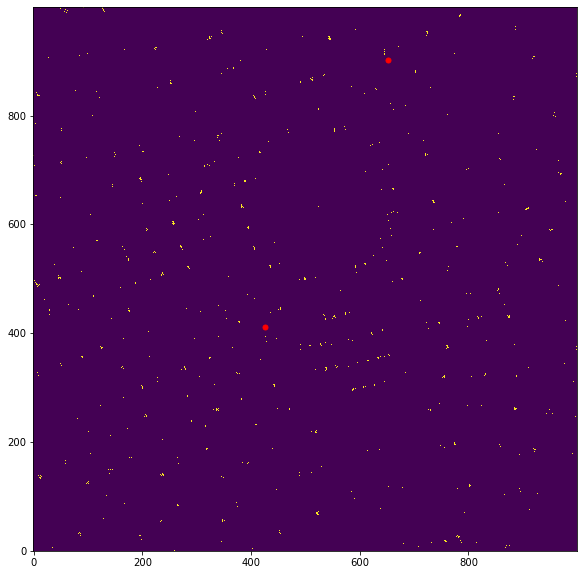

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.imshow(frame, vmin=0, vmax=5000, origin='lower')
ax.plot(ran_x, ran_y, 'ro', markersize=5);

This project has received funding from the European Union's Horizon 2020 research and innovation programme under grant agreement No. 823852.